In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


data = pd.read_csv("electricity_theft_dataset_noisy.csv")



In [3]:
data.shape

(1000, 9)

In [4]:
data.isnull().sum()

hourly_current       0
hourly_voltage       0
power_consumption    0
delta_current        0
delta_voltage        0
touch_sensor         0
month_consumption    0
bill                 0
theft                0
dtype: int64

In [5]:
data.describe

<bound method NDFrame.describe of      hourly_current  hourly_voltage  power_consumption  delta_current  \
0          5.496714      226.996777        1247.736398      -0.337589   
1          4.861736      224.623168        1092.058477      -0.072259   
2          5.647689      220.298152        1244.175347      -0.396210   
3          6.523030      216.765316        1413.966629      -0.153981   
4          4.765847      223.491117        1065.124384      -0.946807   
..              ...             ...                ...            ...   
995        4.718900      225.350751        1063.407594       0.038740   
996        6.797687      219.867394        1494.589620       0.128876   
997        5.640843      215.590627        1216.112848      -0.620880   
998        4.428821      219.184665         970.729650       0.167088   
999        5.572583      216.275487        1205.213054      -0.077630   

     delta_voltage  touch_sensor  month_consumption       bill  theft  
0        -3.81561

In [6]:
data.describe()

,hourly_current,hourly_voltage,power_consumption,delta_current,delta_voltage,touch_sensor,month_consumption,bill,theft
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,4.658099,208.169496,1105.833705,0.002917,-0.037438,0.06100,298.511043,44.602525,0.126000
std,1.889768,53.393548,216.446402,0.491727,2.054265,0.23945,49.398555,9.007849,0.332015
min,-4.667519,-49.094491,391.658824,-1.509756,-5.858897,0.00000,158.348485,17.587639,0.000000
25%,4.227129,216.470697,958.357357,-0.324000,-1.474841,0.00000,266.301039,38.761491,0.000000
50%,4.963270,219.897487,1108.278482,-0.000125,0.000369,0.00000,298.087891,44.391640,0.000000
75%,5.629361,223.363628,1249.628423,0.330458,1.333891,0.00000,331.323030,50.733339,0.000000
max,8.852731,235.965538,2025.043594,1.963119,6.486186,1.00000,455.645510,71.529650,1.000000


In [7]:
features = ['hourly_current', 'hourly_voltage', 'power_consumption', 'delta_current',
            'delta_voltage', 'touch_sensor', 'month_consumption', 'bill']
target = 'theft'

X = data[features]
y = data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)



In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

example = pd.DataFrame({
    'hourly_current': [6.0],
    'hourly_voltage': [225.0],
    'power_consumption': [1350.0],
    'delta_current': [0.5],
    'delta_voltage': [1.0],
    'touch_sensor': [1],
    'month_consumption': [350.0],
    'bill': [70.0]
})
predicted_class = rf_model.predict(example)
print("\nPredicted Theft Status:", predicted_class[0])  

Accuracy: 0.96

Confusion Matrix:
 [[180   0]
 [  8  12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       180
           1       1.00      0.60      0.75        20

    accuracy                           0.96       200
   macro avg       0.98      0.80      0.86       200
weighted avg       0.96      0.96      0.96       200


Predicted Theft Status: 1


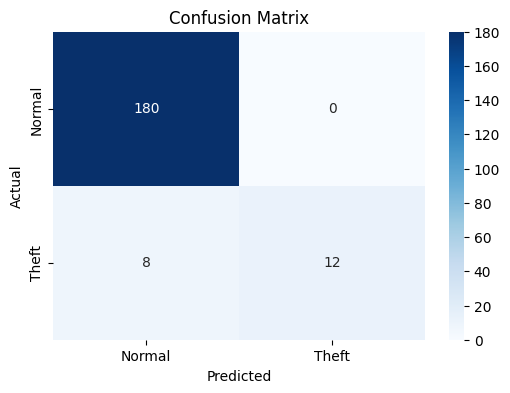

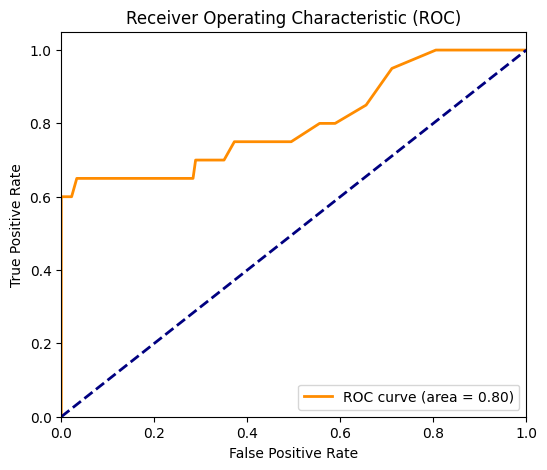

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Theft'], yticklabels=['Normal','Theft'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

from sklearn.metrics import roc_curve, auc

y_prob = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
